In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install matplotlib seaborn

In [ ]:

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

In [ ]:
!pip install gdown

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MentalHealthSurvey.csv')
df.head(2)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment


In [ ]:
print(df.head(3))

  gender  age university   degree_level      degree_major academic_year  \
0   Male   20         PU  Undergraduate      Data Science      2nd year   
1   Male   20        UET   Postgraduate  Computer Science      3rd year   
2   Male   20       FAST  Undergraduate  Computer Science      3rd year   

      cgpa residential_status campus_discrimination sports_engagement  ...  \
0  3.0-3.5         Off-Campus                    No         No Sports  ...   
1  3.0-3.5         Off-Campus                    No         1-3 times  ...   
2  2.5-3.0         Off-Campus                    No         1-3 times  ...   

  study_satisfaction  academic_workload   academic_pressure  \
0                  5                   4                  5   
1                  5                   4                  4   
2                  5                   5                  5   

   financial_concerns  social_relationships  depression  anxiety  isolation  \
0                   4                     3           

In [ ]:
#https://drive.google.com/file/d/1kV7JRb1aqBBV6cWzpOSZK_ZRGZEbmGhx/view?usp=sharing

In [ ]:
df.columns = ['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities']
df.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

In [ ]:

# Step 2: Define the function to convert scores to Yes/No
def convert_to_yes_no(x):
    try:
        # Convert to integer and then apply the conversion
        if isinstance(x, (int, float)):
            return "Yes" if x >= 4 else "No"
        else:
            return x  # Return as is if it's not a number
    except ValueError:
        return x  # Return as is for any conversion error

# List of columns to convert (from 'study_satisfaction' to 'future_insecurity')
columns_to_convert = [
    'study_satisfaction',
    'academic_pressure', 'financial_concerns',
    'social_relationships', 'depression',
    'anxiety', 'isolation', 'future_insecurity'
]

# Apply the conversion to the relevant columns
for col in columns_to_convert:
    df[col] = df[col].apply(convert_to_yes_no)

# Step 3: Save the updated DataFrame to a new CSV file
df.to_csv('Updated_MentalHealthSurvey.csv', index=False)

print("Data conversion complete. Updated file saved as 'Updated_MentalHealthSurvey.csv'.")



Data conversion complete. Updated file saved as 'Updated_MentalHealthSurvey.csv'.


In [ ]:
import os

# Check the current working directory
print(os.getcwd())


/content


In [ ]:
df.to_csv('/content/Updated_MentalHealthSurvey.csv', index=False)
df


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,Yes,4,Yes,Yes,No,No,No,No,No,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,Yes,4,Yes,No,No,No,No,No,Yes,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,Yes,5,Yes,No,Yes,No,No,No,No,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,No,5,Yes,Yes,No,Yes,Yes,Yes,No,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,No,5,Yes,No,No,Yes,Yes,Yes,Yes,Online Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Male,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,Yes,3,No,Yes,Yes,No,No,No,No,"Online Entertainment, Outdoor Activities, Sleep"
83,Female,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,Yes,5,Yes,Yes,No,Yes,Yes,Yes,Yes,"Religious Activities, Sleep"
84,Male,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,Yes,4,No,Yes,No,No,No,No,No,"Religious Activities, Sports and Fitness, Soci..."
85,Male,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,No,3,No,No,No,No,Yes,Yes,Yes,Sleep


In [ ]:
mapping = {'1st': 1, '2nd': 2, '3rd': 3, '4th': 4}

df['academic_year'] = df['academic_year'].apply(
    lambda x: mapping[x.split(' ')[0]] if isinstance(x, str) else x
)

sorted_unique_years = np.sort(df['academic_year'].unique())
sorted_unique_years

array([1, 2, 3, 4])

In [ ]:
df['cgpa'] = df['cgpa'].apply(lambda x : x.strip())
df['cgpa'].unique()

array(['3.0-3.5', '2.5-3.0', '3.5-4.0', '1.5-2.0', '2.0-2.5', '0.0-0.0'],
      dtype=object)

In [ ]:
Course_List = df['degree_major'].unique().tolist()
print(len(Course_List))

df['degree_major'].unique()

4


array(['Data Science', 'Computer Science', 'Software Engineering',
       'Information Technology'], dtype=object)

In [ ]:
course_dic = {
    'course_1': 'Data Science',
    'course_2': 'Computer Science',
    'course_3': 'Software Engineering',
    'course_4': 'Information Technology'
}

df['degree_major'].replace(course_dic,inplace=True)

In [ ]:
len(df['degree_major'].unique().tolist())

4

<ipython-input-19-d4aefadf93fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)


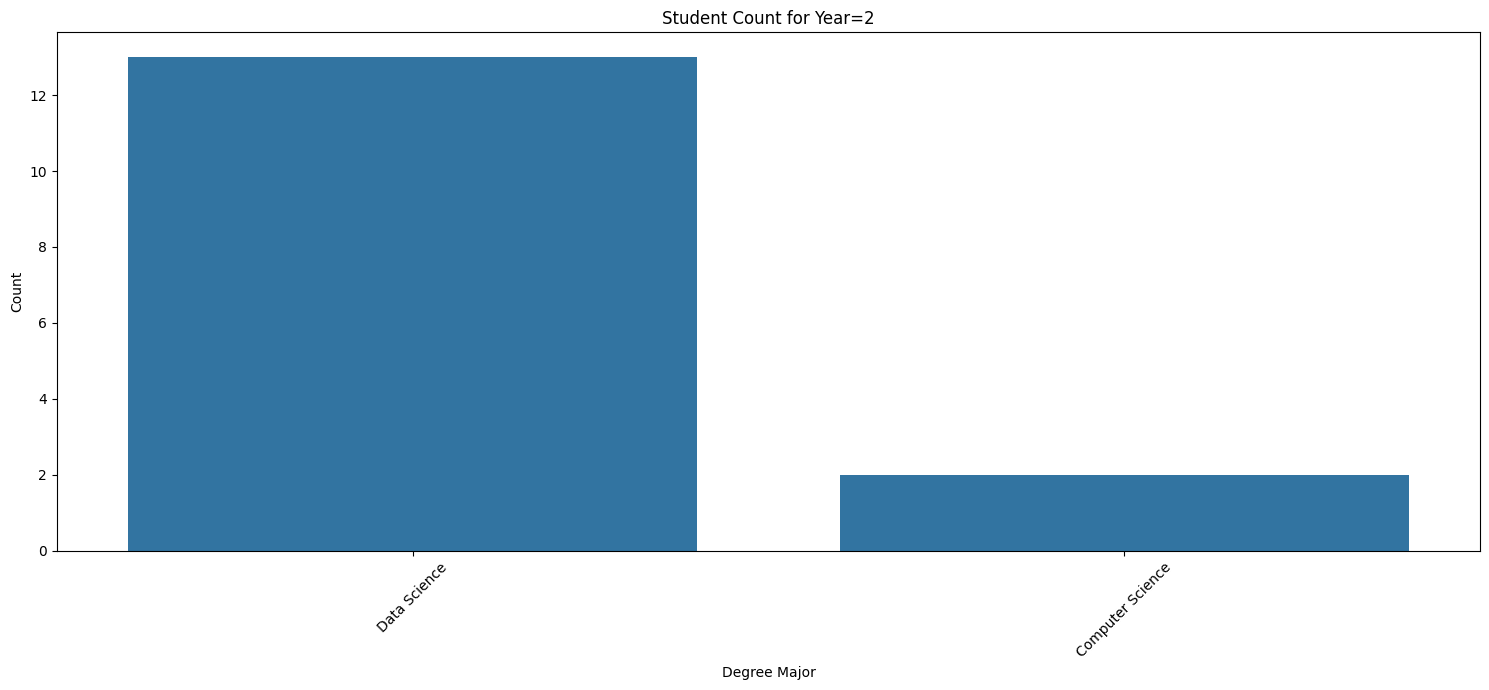

<ipython-input-19-d4aefadf93fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)


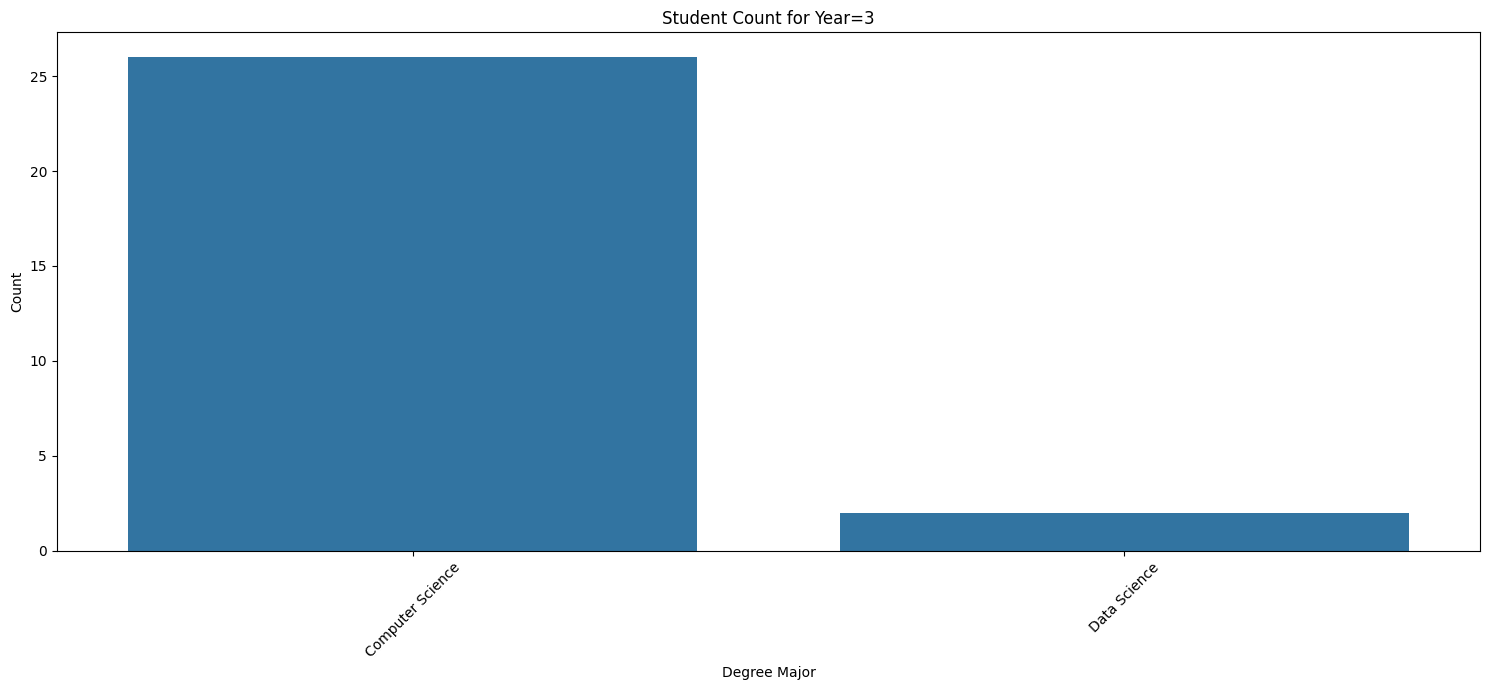

<ipython-input-19-d4aefadf93fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)


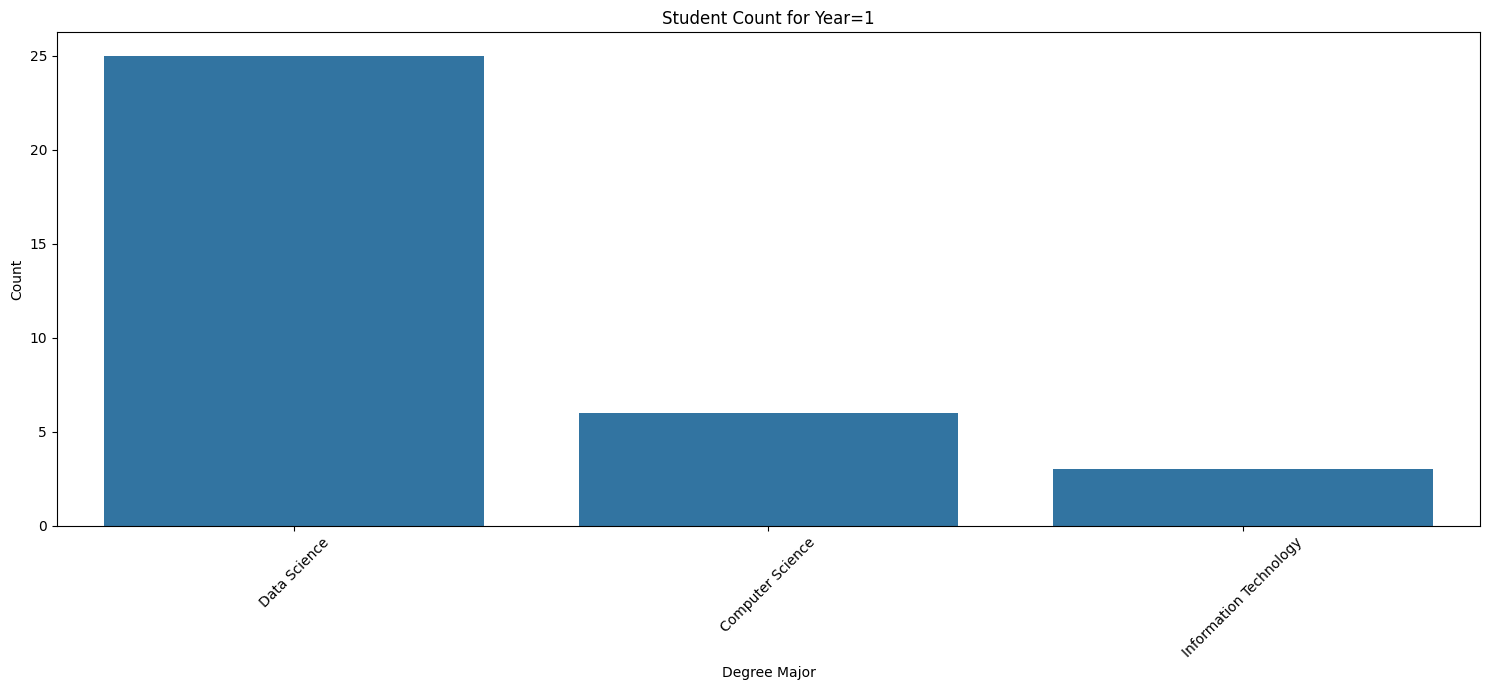

<ipython-input-19-d4aefadf93fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)


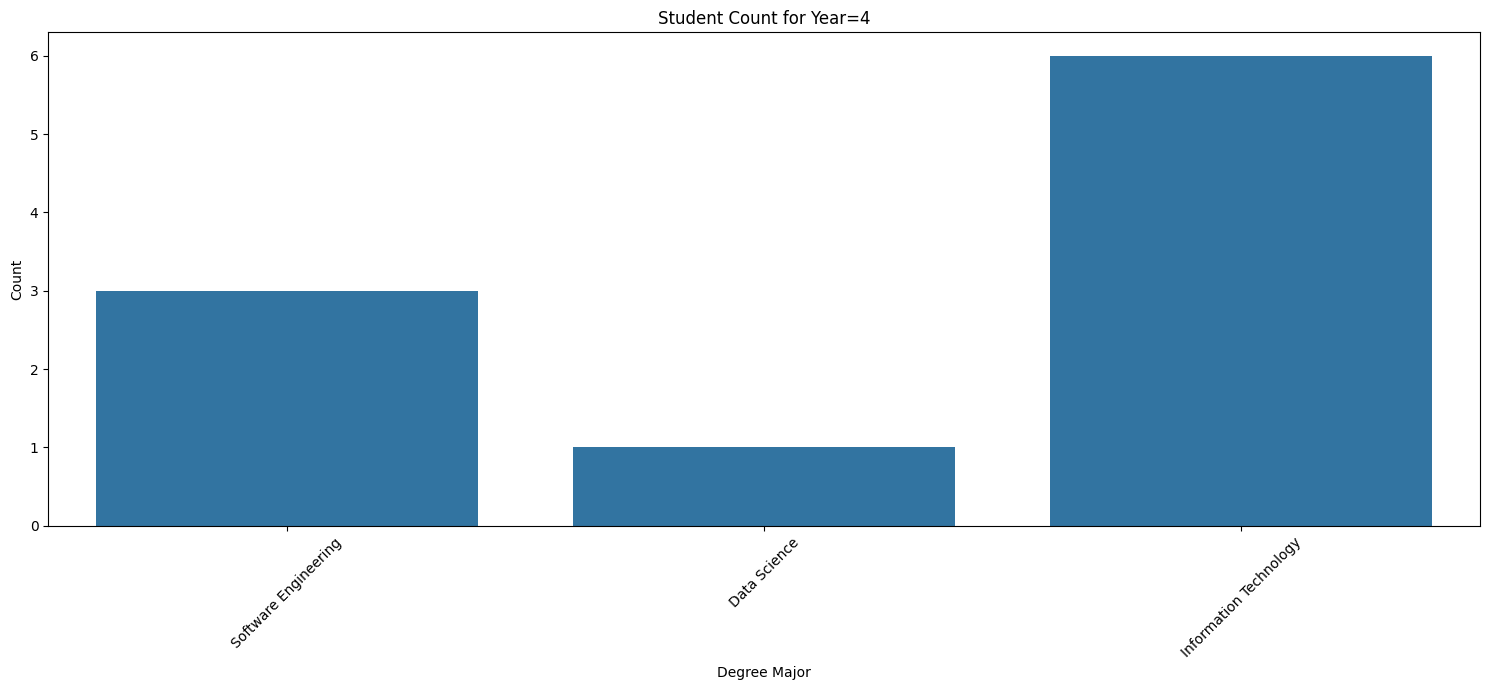

In [ ]:

def plot_student_count(df):
    # Loop through each unique academic year
    for yr in df['academic_year'].unique():
        plt.figure(figsize=(15, 7))

        # Filter the DataFrame for the current academic year
        data_filtered = df[df['academic_year'] == yr]

        # Create the count plot
        pl_1 = sns.countplot(x='degree_major', data=data_filtered)
        pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)
        pl_1.set_title(f'Student Count for Year={yr}')
        pl_1.set_xlabel('Degree Major')
        pl_1.set_ylabel('Count')

        # Show the plot
        plt.tight_layout()
        plt.show()

# Call the function with your DataFrame
plot_student_count(df)


In [ ]:
# def plot_student_cnt(dataframe):
#     for yr in dataframe['academic_year'].unique().tolist():
#         plt.figure(figsize=(15, 7))
#         pl_1 = sns.countplot(x='degree_major',data=dataframe[dataframe['academic_year']==yr])
#         pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)
#         pl_1.set_title(f'Student Count for  Year={yr}')

# plot_student_cnt(df)

Text(0.5, 1.0, 'Course vs Anxiety')

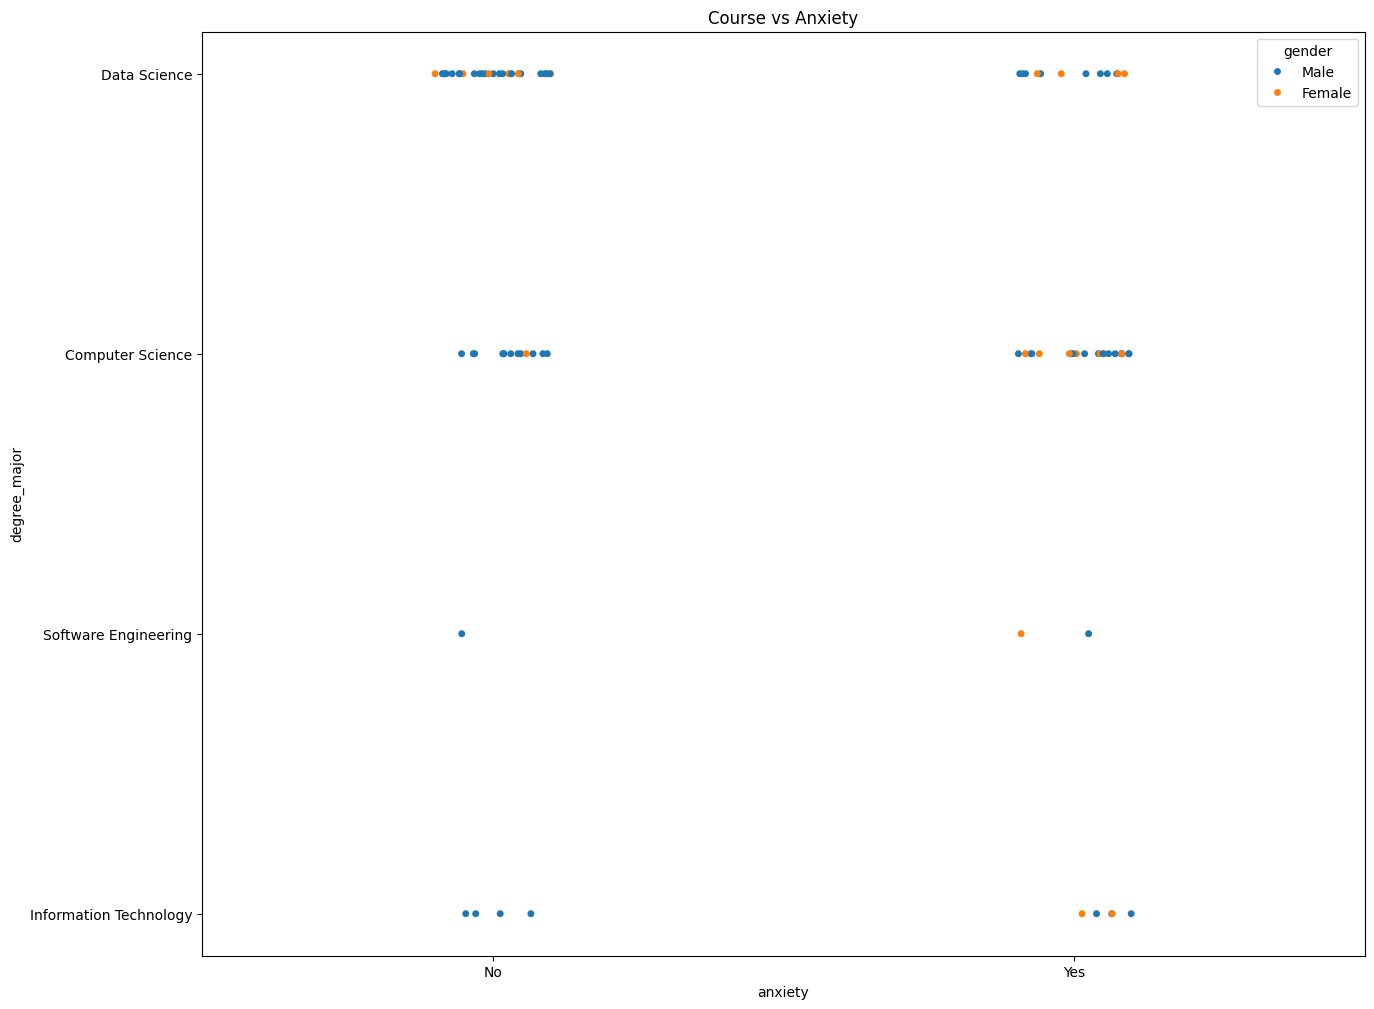

In [ ]:
plt.figure(figsize=(15,12))
plot_1 = sns.stripplot(x='anxiety',y='degree_major',data=df,hue='gender')
plot_1.set_title("Course vs Anxiety")

In [ ]:
# for anxiety_level in range(1, 6):
#     print(f"\n Anxiety Level {anxiety_level} \n")
#     print(df[df['anxiety'] == anxiety_level]['degree_major'].value_counts().nlargest(5))

In [ ]:
print(" No Anxiety \n")
print(df[df['anxiety']=='No']['degree_major'].value_counts().nlargest(5))
print("\n Anxiety \n")
print(df[df['anxiety']=='Yes']['degree_major'].value_counts().nlargest(5))


 No Anxiety 

Data Science              29
Computer Science          13
Information Technology     4
Software Engineering       1
Name: degree_major, dtype: int64

 Anxiety 

Computer Science          21
Data Science              12
Information Technology     5
Software Engineering       2
Name: degree_major, dtype: int64


In [ ]:
# print(df['anxiety'].unique())
# # Check No Anxiety level (1)
# No_Anx = df[df['anxiety'] == 1]['degree_major'].unique().tolist()
# print("No Anxiety (1):", No_Anx)

# # Check Anxiety levels (2-5)
# Anx = df[df['anxiety'].isin([2, 3, 4, 5])]['degree_major'].unique().tolist()
# set1 = set(No_Anx)
# set2 = set(Anx)
# print("Anxiety (2-5):", Anx)


In [ ]:
df[['anxiety','gender']].groupby('gender')['anxiety'].value_counts()

gender  anxiety
Female  Yes        14
        No         10
Male    No         37
        Yes        26
Name: anxiety, dtype: int64

In [ ]:
Anx = df[df['anxiety']=='Yes']['degree_major'].unique().tolist()
No_Anx = df[df['anxiety']=='No']['degree_major'].unique().tolist()


set1 = set(No_Anx)
set2 = set(Anx)

print(list(sorted(set1 - set2)))

[]


Text(0.5, 1.0, 'Course vs Depression')

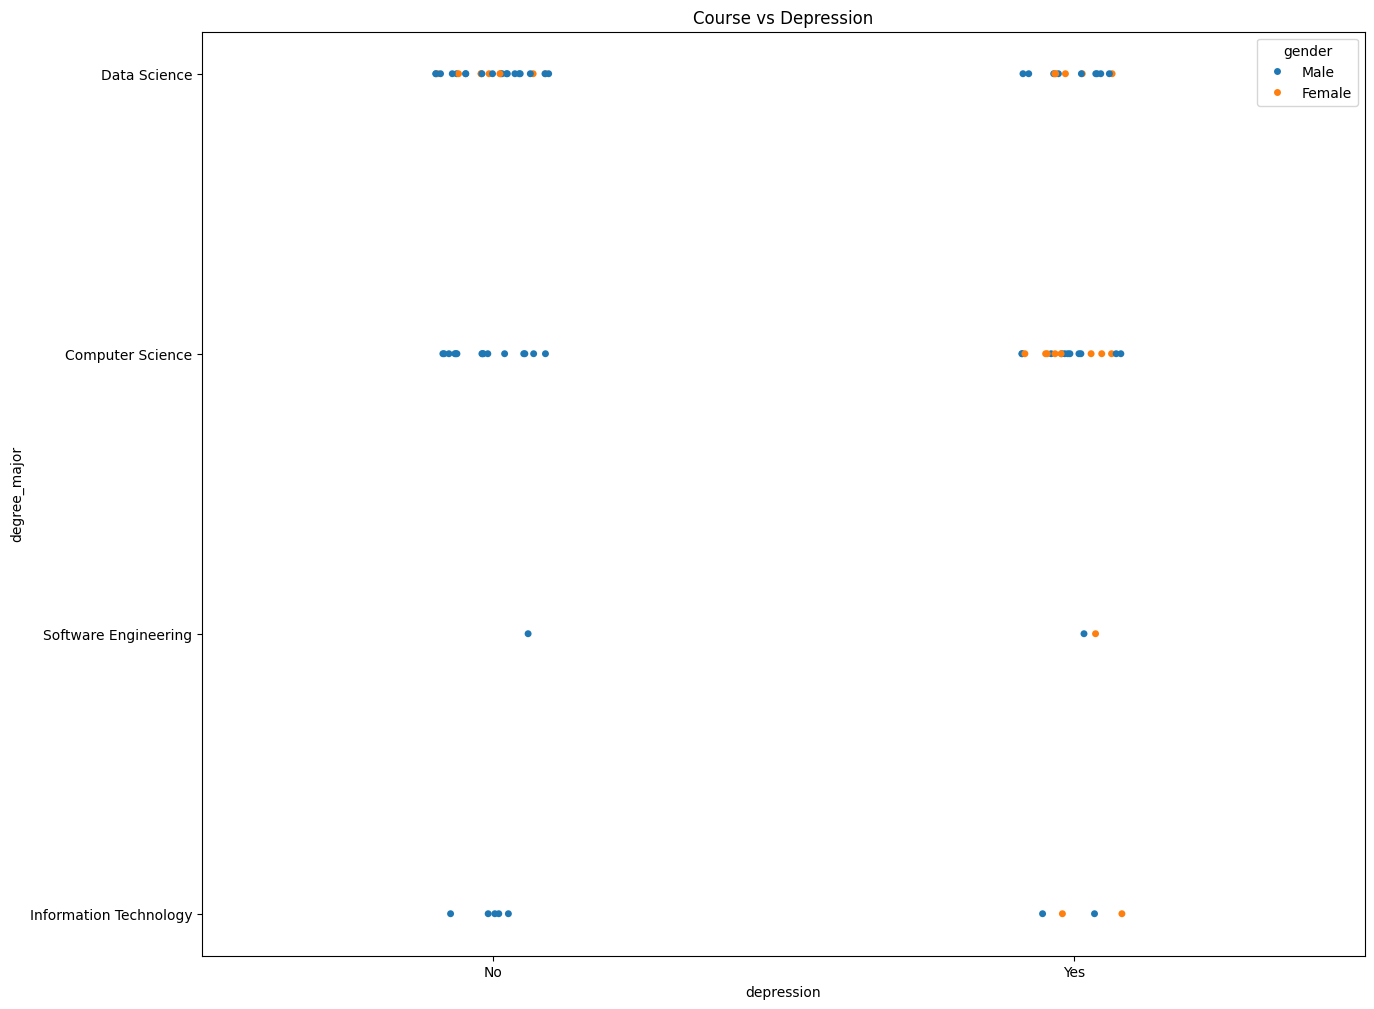

In [ ]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='depression',y='degree_major',data=df,hue='gender')
plot_2.set_title("Course vs Depression")

In [ ]:
# print(df[df['depression'].isin([2, 3, 4, 5])]['degree_major'].value_counts().nlargest(5))

In [ ]:
print(df[df['depression']=='Yes']['degree_major'].value_counts().nlargest(5))

Computer Science          19
Data Science              14
Information Technology     4
Software Engineering       2
Name: degree_major, dtype: int64


In [ ]:
df.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

In [ ]:
df[['gender','depression']].value_counts()

gender  depression
Male    No            40
        Yes           23
Female  Yes           16
        No             8
dtype: int64

In [ ]:
def problem(dataframe):
    list = ['depression','anxiety']
    for i in list:
        print(df[['academic_year',i]].groupby('academic_year')[i].value_counts())
        print('\n')

problem(df)

academic_year  depression
1              No            17
               Yes           17
2              No            13
               Yes            2
3              No            14
               Yes           14
4              Yes            6
               No             4
Name: depression, dtype: int64


academic_year  anxiety
1              No         19
               Yes        15
2              No         12
               Yes         3
3              Yes        16
               No         12
4              Yes         6
               No          4
Name: anxiety, dtype: int64




<Axes: xlabel='age', ylabel='count'>

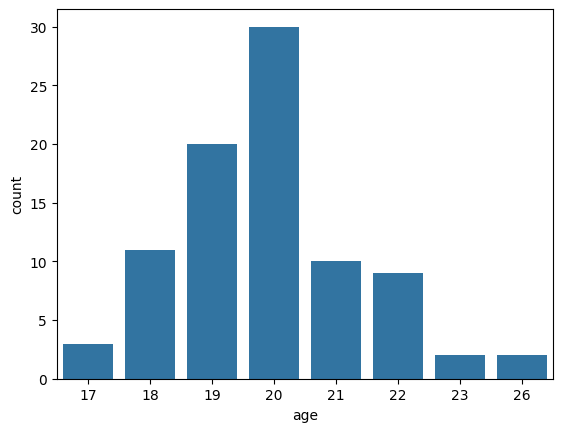

In [ ]:
sns.countplot(x='age',data=df)

In [ ]:
row_idx = df[df['age']==20].index

In [ ]:
df.iloc[row_idx]

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2,3.0-3.5,Off-Campus,No,No Sports,...,Yes,4,Yes,Yes,No,No,No,No,No,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3,3.0-3.5,Off-Campus,No,1-3 times,...,Yes,4,Yes,No,No,No,No,No,Yes,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3,2.5-3.0,Off-Campus,No,1-3 times,...,Yes,5,Yes,No,Yes,No,No,No,No,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3,2.5-3.0,On-Campus,No,No Sports,...,No,5,Yes,Yes,No,Yes,Yes,Yes,No,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3,3.0-3.5,Off-Campus,Yes,No Sports,...,No,5,Yes,No,No,Yes,Yes,Yes,Yes,Online Entertainment
5,Female,20,UET,Undergraduate,Computer Science,3,3.0-3.5,Off-Campus,No,No Sports,...,Yes,5,Yes,No,No,Yes,Yes,Yes,Yes,"Religious Activities, Social Connections, Onli..."
8,Male,20,COMSATS,Undergraduate,Computer Science,3,2.5-3.0,Off-Campus,Yes,1-3 times,...,No,4,No,Yes,No,No,Yes,No,Yes,"Religious Activities, Social Connections, Onli..."
10,Male,20,COMSATS,Undergraduate,Computer Science,2,3.0-3.5,On-Campus,No,No Sports,...,Yes,4,Yes,No,Yes,No,No,No,No,"Religious Activities, Online Entertainment"
11,Male,20,COMSATS,Undergraduate,Computer Science,3,3.0-3.5,Off-Campus,No,1-3 times,...,Yes,5,Yes,Yes,Yes,No,No,No,No,"Religious Activities, Sports and Fitness, Soci..."
14,Female,20,PU,Undergraduate,Data Science,1,3.0-3.5,Off-Campus,No,No Sports,...,No,3,No,No,No,Yes,No,Yes,No,Religious Activities


(57, 21)


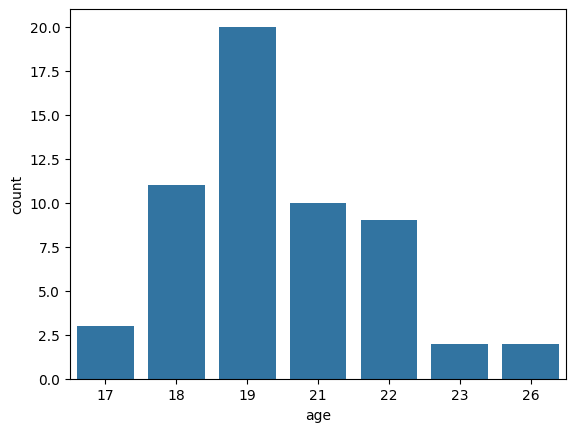

In [ ]:
df_1 = df.drop(row_idx)

sns.countplot(x='age',data=df_1)

print(df_1.shape)

In [ ]:
from scipy.stats import shapiro
print(df[['age','academic_year']].skew())

print("For age :", shapiro(df[['age']]))

print("For Year :", shapiro(df[['academic_year']]))

age              1.162576
academic_year    0.242807
dtype: float64
For age : ShapiroResult(statistic=0.8945419543461477, pvalue=3.248523690458051e-06)
For Year : ShapiroResult(statistic=0.8236905517507427, pvalue=8.458825408602608e-09)


In [ ]:
df_1 = df.drop('financial_concerns',axis=1)

In [ ]:
df_2 = df_1.drop('social_relationships',axis = 1)

In [ ]:
df_3 = df_2.drop('isolation',axis=1)

In [ ]:
df_3.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'depression', 'anxiety',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

<Axes: xlabel='academic_year', ylabel='Density'>

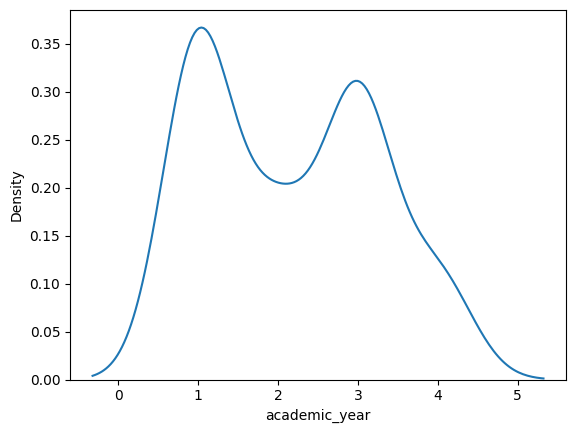

In [ ]:

sns.kdeplot(df['academic_year'])

<Axes: xlabel='age', ylabel='Density'>

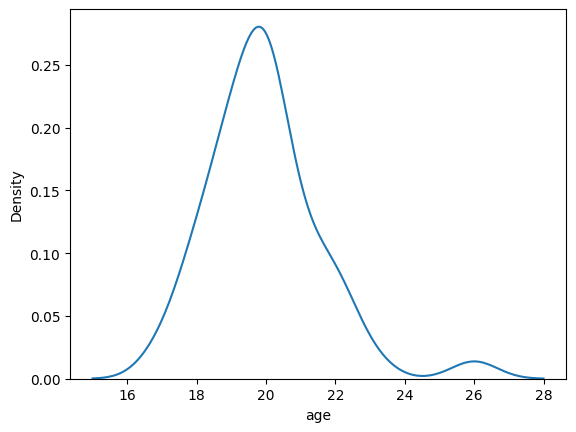

In [ ]:
sns.kdeplot(df['age'])

<Axes: xlabel='cgpa', ylabel='count'>

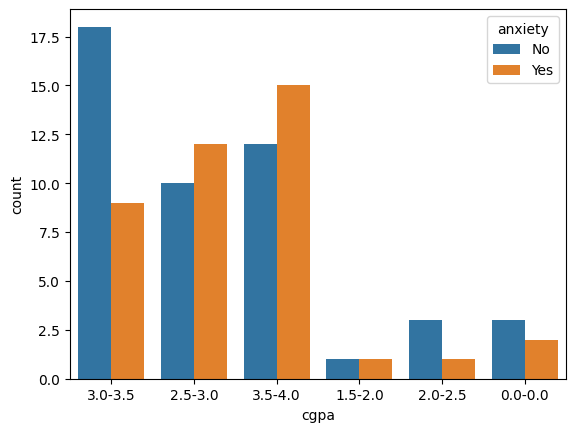

In [ ]:

sns.countplot(x='cgpa',data=df_1,hue='anxiety')

Text(0.5, 1.0, 'Count of CGPA by Depression')

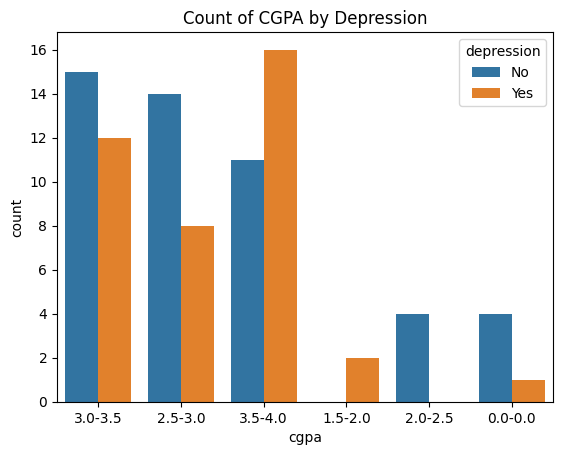

In [ ]:

plot_2 = sns.countplot(x='cgpa',data=df_1,hue='depression')
plot_2.set_title('Count of CGPA by Depression')

<Axes: xlabel='academic_year', ylabel='count'>

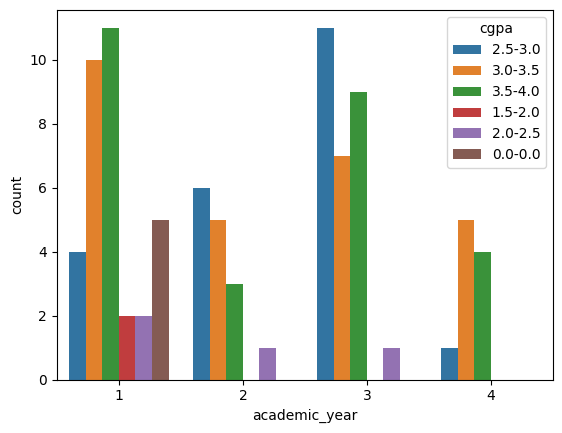

In [ ]:
sns.countplot(x='academic_year',data=df_1,hue='cgpa')

In [ ]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder()

cat_features = df_3.select_dtypes(include=['object']).columns.tolist()

for feature in cat_features:
    df_3[feature] = enc.fit_transform(df_3[feature])

In [ ]:
df_3.dtypes

,0
gender,int64
age,int64
university,int64
degree_level,int64
degree_major,int64
academic_year,int64
cgpa,int64
residential_status,int64
campus_discrimination,int64
sports_engagement,int64


In [ ]:
df_3

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,depression,anxiety,future_insecurity,stress_relief_activities
0,1,20,4,1,1,2,4,0,0,3,1,1,4,1,0,0,0,16
1,1,20,5,0,0,3,4,0,0,0,1,1,4,1,0,0,1,4
2,1,20,1,1,0,3,3,0,0,0,0,1,5,1,0,0,0,22
3,1,20,5,1,0,3,3,1,0,3,1,0,5,1,1,1,0,4
4,0,20,5,1,0,3,4,0,1,3,1,0,5,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1,22,4,1,2,4,4,1,0,3,2,1,3,0,0,0,0,5
83,0,22,0,1,3,4,5,0,1,3,0,1,5,1,1,1,1,14
84,1,21,4,1,1,2,2,0,0,3,1,1,4,0,0,0,0,27
85,1,22,4,1,1,2,3,0,0,3,1,0,3,0,0,1,1,29


<Axes: >

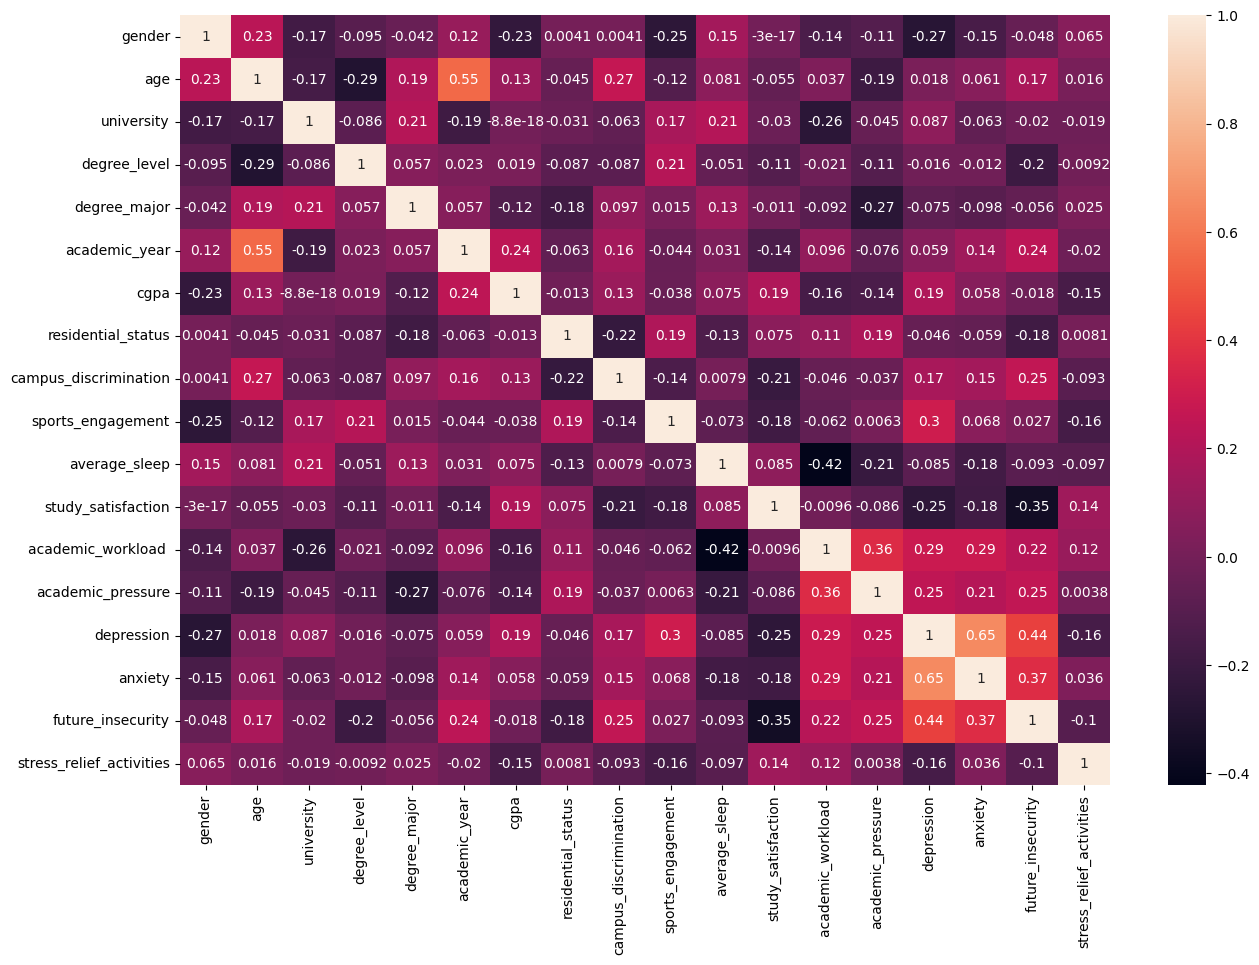

In [ ]:
plt.figure(figsize=(15,10))
cor_mat = df_3.corr(method='pearson')
sns.heatmap(cor_mat,annot=True)

In [ ]:
def func(dataframe):
    dep = ['anxiety','depression']
    for d in dep:
        print(f'\n---------{d}--------')
        print(dataframe[['age',d]].groupby(d)['age'].value_counts())
        print('\n')

func(df_3)



---------anxiety--------
anxiety  age
0        20     16
         19     12
         18      7
         21      6
         22      5
         23      1
1        20     14
         19      8
         18      4
         21      4
         22      4
         17      3
         26      2
         23      1
Name: age, dtype: int64



---------depression--------
depression  age
0           20     17
            19     11
            18      7
            21      6
            22      6
            23      1
1           20     13
            19      9
            18      4
            21      4
            17      3
            22      3
            26      2
            23      1
Name: age, dtype: int64




In [ ]:
df_3.sample(2)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,depression,anxiety,future_insecurity,stress_relief_activities
80,0,21,4,1,2,4,4,0,0,3,2,0,4,1,1,1,1,6
34,0,17,4,1,0,1,5,1,0,3,1,1,5,1,1,1,0,29


#Training

In [ ]:
df_2_f = df_3.drop('cgpa',axis=1) # Since CGPA have least or no effect on Treatment seen from PPS and Pearson matrix
df_2_f.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'depression', 'anxiety',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

In [ ]:
x = df_2_f.drop('future_insecurity',axis=1)
# print(x)
y = df_2_f['future_insecurity']


In [ ]:
# df_2_f.to_excel('Encoded_excel.xlsx')

In [ ]:
!pip install matplotlib

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import ExtraTreesClassifier
# # Assuming x and y are already defined as your features and target variable
# model = ExtraTreesClassifier()
# model.fit(x, y)

# # Feature importance
# feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:

os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 46, 1: 23})
The number of classes after fit Counter({0: 46, 1: 46})


In [ ]:

from sklearn.ensemble import AdaBoostClassifier

ada_ovr = AdaBoostClassifier(n_estimators=300,learning_rate=0.25)
ada_ovr.fit(X_train_os,Y_train_os)

y_pred_ovr = ada_ovr.predict(X_test)
print(classification_report(Y_test,y_pred_ovr))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.78      0.70      0.74        10

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18



In [ ]:
df_2_f['future_insecurity'].value_counts()

,future_insecurity
0,54
1,33


In [ ]:
x = df_2_f.drop('future_insecurity',axis=1)
# print(x)
y = df_2_f['future_insecurity']

In [ ]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 20)


In [ ]:
categorical_columns = x.select_dtypes(include=['int']).columns.tolist()
categorical_columns

['gender',
 'age',
 'university',
 'degree_level',
 'degree_major',
 'academic_year',
 'residential_status',
 'campus_discrimination',
 'sports_engagement',
 'average_sleep',
 'study_satisfaction',
 'academic_workload ',
 'academic_pressure',
 'depression',
 'anxiety',
 'stress_relief_activities']

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_1 = CatBoostClassifier(class_weights={0:0.2,1:0.8})
cat_1.fit(x_train,y_train,cat_features=categorical_columns)

Learning rate set to 0.003289
0:	learn: 0.6918245	total: 55.6ms	remaining: 55.5s
1:	learn: 0.6895358	total: 66.3ms	remaining: 33.1s
2:	learn: 0.6891630	total: 67.8ms	remaining: 22.5s
3:	learn: 0.6887667	total: 70.3ms	remaining: 17.5s
4:	learn: 0.6883985	total: 72.7ms	remaining: 14.5s
5:	learn: 0.6871547	total: 82.5ms	remaining: 13.7s
6:	learn: 0.6855237	total: 91.9ms	remaining: 13s
7:	learn: 0.6838715	total: 103ms	remaining: 12.8s
8:	learn: 0.6818633	total: 112ms	remaining: 12.4s
9:	learn: 0.6804145	total: 120ms	remaining: 11.9s
10:	learn: 0.6790986	total: 131ms	remaining: 11.8s
11:	learn: 0.6771543	total: 142ms	remaining: 11.7s
12:	learn: 0.6749775	total: 152ms	remaining: 11.6s
13:	learn: 0.6746359	total: 154ms	remaining: 10.9s
14:	learn: 0.6729991	total: 165ms	remaining: 10.8s
15:	learn: 0.6726626	total: 167ms	remaining: 10.3s
16:	learn: 0.6706006	total: 171ms	remaining: 9.91s
17:	learn: 0.6687531	total: 177ms	remaining: 9.64s
18:	learn: 0.6670333	total: 183ms	remaining: 9.44s
19:	le

In [ ]:
y_pred_1 = cat_1.predict(x_test)

print(classification_report(y_test,y_pred_1,zero_division=1))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.50      0.60      0.55        10

    accuracy                           0.44        18
   macro avg       0.42      0.42      0.42        18
weighted avg       0.43      0.44      0.43        18



In [ ]:
df_2_f['anxiety'].value_counts()

,anxiety
0,47
1,40


In [ ]:
x_pa = df_2_f.drop('anxiety',axis=1)
y_pa = df_2_f['anxiety']

In [ ]:
x_pa_train,x_pa_test,y_pa_train,y_pa_test = train_test_split(x_pa,y_pa,test_size=0.2,random_state=20)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:




models = {

    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()

}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(x_pa_train,y_pa_train)


    y_test_pred = class_models.predict(x_pa_test)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_pa_test, y_test_pred)
    model_test_f1 = f1_score(y_pa_test, y_test_pred,average='weighted')
    model_test_precision = precision_score(y_pa_test, y_test_pred)
    model_test_recall = recall_score(y_pa_test, y_test_pred)
    # classification_rep = classification_report(y_pa_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)

    print(' ======================================================== ')
    print('\n')



<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.8333
F1_score : 0.8328
Precision : 0.8000
Recall : 0.8889


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.6667
F1_score : 0.6625
Precision : 0.6364
Recall : 0.7778


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.8333
F1_score : 0.8328
Precision : 0.8750
Recall : 0.7778


Learning rate set to 0.003289
0:	learn: 0.6912959	total: 2.3ms	remaining: 2.3s
1:	learn: 0.6892377	total: 4.07ms	remaining: 2.03s
2:	learn: 0.6873851	total: 5.38ms	remaining: 1.79s
3:	learn: 0.6856949	total: 7.09ms	remaining: 1.76s
4:	learn: 0.6837920	total: 8.75ms	remaining: 1.74s
5:	learn: 0.6817564	total: 9.78ms	remaining: 1.62s
6:	learn: 0.6794067	total: 11.6ms	remaining: 1.64s
7:	learn: 0.6775252	total: 13ms	remaining: 1.61s
8:	learn: 0.6755085	total: 14.4ms	remaining: 1.58s
9:	learn: 0.6736601	total: 15.8ms	remaining: 1.56s

In [ ]:

cat_2 = CatBoostClassifier()
cat_2.fit(x_pa_train,y_pa_train)

y_pred_rs = cat_2.predict(x_pa_test)
print(accuracy_score(y_pa_test,y_pred_rs))
print(f1_score(y_pa_test,y_pred_rs,average='weighted'))


Learning rate set to 0.003289
0:	learn: 0.6912959	total: 1.71ms	remaining: 1.7s
1:	learn: 0.6892377	total: 3.59ms	remaining: 1.79s
2:	learn: 0.6873851	total: 4.64ms	remaining: 1.54s
3:	learn: 0.6856949	total: 6.3ms	remaining: 1.57s
4:	learn: 0.6837920	total: 7.73ms	remaining: 1.54s
5:	learn: 0.6817564	total: 8.76ms	remaining: 1.45s
6:	learn: 0.6794067	total: 10.1ms	remaining: 1.43s
7:	learn: 0.6775252	total: 11.5ms	remaining: 1.42s
8:	learn: 0.6755085	total: 12.9ms	remaining: 1.42s
9:	learn: 0.6736601	total: 14.3ms	remaining: 1.41s
10:	learn: 0.6719053	total: 15.6ms	remaining: 1.41s
11:	learn: 0.6696713	total: 16.4ms	remaining: 1.35s
12:	learn: 0.6672809	total: 18.1ms	remaining: 1.37s
13:	learn: 0.6648575	total: 19.5ms	remaining: 1.37s
14:	learn: 0.6626711	total: 20.9ms	remaining: 1.37s
15:	learn: 0.6604677	total: 22.2ms	remaining: 1.37s
16:	learn: 0.6587965	total: 22.9ms	remaining: 1.33s
17:	learn: 0.6572043	total: 24ms	remaining: 1.31s
18:	learn: 0.6547880	total: 25.5ms	remaining: 1.

In [ ]:
x_dep = df_2_f.drop('depression',axis=1)
y_dep = df_2_f['depression']

In [ ]:
x_dep_train,x_dep_test,y_dep_train,y_dep_test = train_test_split(x_dep,y_dep,test_size=0.2,random_state=40)

In [ ]:

models = {

    RandomForestClassifier : RandomForestClassifier(),
    DecisionTreeClassifier : DecisionTreeClassifier(),
    XGBClassifier : XGBClassifier(),
    CatBoostClassifier : CatBoostClassifier()

}


for i in range(len(list(models))):
    class_models = list(models.values())[i]
    class_models.fit(x_dep_train,y_dep_train)


    y_dep_pred = class_models.predict(x_dep_test)

    # Test set Performance
    model_test_accuracy = accuracy_score(y_dep_test, y_dep_pred)
    model_test_f1 = f1_score(y_dep_test, y_dep_pred,average='weighted')
    model_test_precision = precision_score(y_dep_test, y_dep_pred)
    model_test_recall = recall_score(y_dep_test, y_dep_pred)
    # classification_rep = classification_report(y_pa_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Test Set")
    print("Accuracy : {:.4f}".format(model_test_accuracy))
    print("F1_score : {:.4f}".format(model_test_f1))
    print("Precision : {:.4f}".format(model_test_precision))
    print("Recall : {:.4f}".format(model_test_recall))
    # print("Classifcatiom Report :", classification_rep)

    print(' ======================================================== ')
    print('\n')

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Performance for Test Set
Accuracy : 0.8333
F1_score : 0.8286
Precision : 1.0000
Recall : 0.6667


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Model Performance for Test Set
Accuracy : 0.7778
F1_score : 0.7662
Precision : 1.0000
Recall : 0.5556


<class 'xgboost.sklearn.XGBClassifier'>
Model Performance for Test Set
Accuracy : 0.8333
F1_score : 0.8286
Precision : 1.0000
Recall : 0.6667


Learning rate set to 0.003289
0:	learn: 0.6911511	total: 1.23ms	remaining: 1.23s
1:	learn: 0.6888805	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6867070	total: 4.15ms	remaining: 1.38s
3:	learn: 0.6844610	total: 5.54ms	remaining: 1.38s
4:	learn: 0.6823222	total: 7.18ms	remaining: 1.43s
5:	learn: 0.6801795	total: 8.74ms	remaining: 1.45s
6:	learn: 0.6781414	total: 9.83ms	remaining: 1.39s
7:	learn: 0.6756600	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6736382	total: 12.4ms	remaining: 1.37s
9:	learn: 0.6713743	total: 14ms	remaining: 1.3

In [ ]:

params = {
    'n_estimators' : [50,100,200,300,400,500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,5,8]

}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rs = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,warm_start=True,max_features='sqrt'),
         param_distributions =
    {
    'n_estimators' : [50,100,200,300,400,500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,5,8]

    },
    cv=3,
    return_train_score=False,
    refit = True

    )
rs.fit(x_dep_train,y_dep_train)
pd.DataFrame(rs.cv_results_)[['param_n_estimators','param_criterion','param_max_depth','mean_test_score']].nlargest(3,columns='mean_test_score')


,param_n_estimators,param_criterion,param_max_depth,mean_test_score
2,100,gini,2,0.768116
7,500,gini,2,0.753623
0,300,gini,5,0.739130


from matplotlib import pyplot as plt
_df_0['mean_test_score'].plot(kind='hist', bins=20, title='mean_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('param_n_estimators').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('param_max_depth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mean_test_score'].plot(kind='line', figsize=(8, 4), title='mean_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['param_max_depth'].value_counts()
    for x_label, grp in _df_4.groupby('param_n_estimators')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('param_n_estimators')
_ = plt.ylabel('param_max_depth')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['param_n_estimators'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='mean_test_score', y='param_n_estimators', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['param_max_depth'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='mean_test_score', y='param_max_depth', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_0['mean_test_score'].plot(kind='hist', bins=20, title='mean_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

y_rs_pred = rs.predict(x_dep_test)

print(f1_score(y_dep_test,y_rs_pred))
print(accuracy_score(y_dep_test,y_rs_pred))

0.8
0.8333333333333334
